<a href="https://colab.research.google.com/github/hp77-creator/100-Days-Of-ML-Code/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
house_data = pd.DataFrame(boston.data)
house_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
house_data.columns = boston.feature_names
house_data['price'] = boston.target
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df = pd.DataFrame(house_data[['RM', 'price']])

In [ ]:
df.head()

,RM,price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [ ]:
df.shape

(506, 2)

In [ ]:
x = df['RM']
y = df['price']

x = (x - x.mean())/x.std()
x = np.c_[np.ones(x.shape[0]), x] 

In [ ]:
x.shape

(506, 2)

In [ ]:
def loss(h, y):
  sq_error = (h - y) ** 2
  n = len(y)
  return (1/2*n)*sq_error.sum()

In [ ]:
class LinearRegression:
  def predict(self, X):
    return np.dot(X, self._W)

  def _gradient_descent_step(self, X, targets, lr):

    predictions = self.predict(X)

    error = predictions - targets
    gradient = np.dot(X.T, error)/len(X)
    
    self._W -= lr * gradient

  def fit(self, X, y, n_iter=10000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    self.cost_history = []
    self.w_history = [self._W]

    for i in range(n_iter):

      predictions = self.predict(X)
      cost = loss(predictions, y)

      self.cost_history.append(cost)
      self._gradient_descent_step(X, y, lr)
      self.w_history.append(self._W.copy())

    return self

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x, y, n_iter=2000, lr=0.01)

In [ ]:
linear_model._W

array([22.53280628,  6.3952978 ])

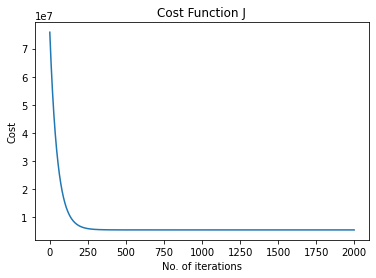

In [ ]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(linear_model.cost_history)
plt.show()

In [ ]:
linear_model.cost_history

[75805464.02,
 74408214.70995268,
 73038766.60000968,
 71696566.52694714,
 70381072.33388753,
 69091752.65130496,
 67828086.68238823,
 66589563.992674254,
 65375684.30386739,
 64185957.291760966,
 63019902.3881798,
 61877048.586863264,
 60756934.25321095,
 59659106.93781364,
 58583123.19369463,
 57528548.39718726,
 56494956.572376676,
 55481930.21903451,
 54489060.14397724,
 53515945.29578002,
 52562192.60277926,
 51627416.81429841,
 50711240.34503299,
 49813293.122531846,
 48933212.437713034,
 48070642.79835418,
 47225235.785497814,
 46396649.912713796,
 45584550.48816218,
 44788609.47940047,
 44008505.3808809,
 43243923.084084064,
 42494553.75023665,
 41760094.68556156,
 41040249.219010316,
 40334726.58242815,
 39643241.79310353,
 38965515.53865457,
 38301274.0642059,
 37650249.06181035,
 37012177.56207084,
 36386801.827918716,
 35773869.250505544,
 35173132.24716634,
 34584348.161413155,
 34007279.164918296,
 33441692.161448024,
 32887358.692707524,
 32344054.846059356,
 31811561.16